# 📊 Ətraflı Təhlil - CEO Təqdimatı üçün
# Detailed Analysis for CEO Presentation

Bu notebook CEO səviyyəli təqdimat üçün bütün lazımi təhlilləri və qrafikləri hazırlayır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Azərbaycan dili dəstəyi
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.style.use('seaborn-v0_8-whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Kitabxanalar yükləndi")

✅ Kitabxanalar yükləndi


In [2]:
# Məlumatları yüklə
DATA_PATH = Path('data/ml_ready_data.csv')
df = pd.read_csv(DATA_PATH)

# Boş sonu çıxart
df = df[df['Nağd_pul_kredit_satışı'].notna()].copy()

print(f"📊 Məlumatlar yükləndi: {df.shape}")
print(f"📅 Dövr: {df['Year'].min()}-Q{df['Quarter'].min()} → {df['Year'].max()}-Q{df['Quarter'].max()}")
print(f"📈 Müşahidələr: {len(df)}")

📊 Məlumatlar yükləndi: (22, 44)
📅 Dövr: 2020-Q1 → 2025-Q4
📈 Müşahidələr: 22


## 1️⃣ İcraçı Xülasə Statistikası

In [3]:
target = 'Nağd_pul_kredit_satışı'

# Əsas statistika
stats_summary = {
    'Ortalama Rüblük Satış': df[target].mean(),
    'Median Satış': df[target].median(),
    'Minimum Satış': df[target].min(),
    'Maksimum Satış': df[target].max(),
    'Standart Sapma': df[target].std(),
    'Variasiya Əmsalı (%)': (df[target].std() / df[target].mean()) * 100,
    'Ümumi Satış': df[target].sum(),
    'Ortalama İllik Artım (%)': df[target].pct_change(periods=4).mean() * 100
}

print("="*80)
print("İCRAÇI XÜLASƏ - ƏSAS RƏQƏMLƏr")
print("="*80)
for key, val in stats_summary.items():
    if 'Ümumi' in key:
        print(f"{key:35s}: {val:>18,.0f} AZN")
    elif '%' in key:
        print(f"{key:35s}: {val:>18,.2f}%")
    else:
        print(f"{key:35s}: {val:>18,.0f} AZN")

İCRAÇI XÜLASƏ - ƏSAS RƏQƏMLƏr
Ortalama Rüblük Satış              :         84,884,916 AZN
Median Satış                       :         93,016,445 AZN
Minimum Satış                      :         15,709,384 AZN
Maksimum Satış                     :        126,285,414 AZN
Standart Sapma                     :         31,290,414 AZN
Variasiya Əmsalı (%)               :              36.86%
Ümumi Satış                        :      1,867,468,142 AZN
Ortalama İllik Artım (%)           :              48.40%


## 2️⃣ Trend Analizi

In [4]:
# İllik statistika
yearly_stats = df.groupby('Year').agg({
    target: ['sum', 'mean', 'std', 'count'],
    'Müştəri_sayı': 'sum',
    'GDP': 'mean',
    'NPLs': 'mean'
}).round(2)

print("\n📊 İLLƏr ÜZrƏ STATİSTİKA")
print(yearly_stats)


📊 İLLƏr ÜZrƏ STATİSTİKA
     Nağd_pul_kredit_satışı                                Müştəri_sayı  \
                        sum         mean         std count          sum   
Year                                                                      
2020           140001771.45  35000442.86 16793740.57     4    102782.00   
2021           278480791.05  69620197.76 11314783.43     4    191781.00   
2022           410794411.91 102698602.98 21853930.11     4    234317.00   
2023           376492131.66  94123032.92 12714889.86     4    333386.00   
2024           444555889.29 111138972.32 14277065.27     4    813735.00   
2025           217143146.86 108571573.43 20631243.27     2    497977.00   

             GDP  NPLs  
            mean  mean  
Year                    
2020 18144525.00 31.91  
2021 23300800.00 34.20  
2022 33456450.00 15.69  
2023 30751375.00 17.52  
2024 31584250.00 17.57  
2025 31039100.00 24.99  


In [5]:
# Rüblük statistika
quarterly_stats = df.groupby('Quarter').agg({
    target: ['mean', 'std', 'min', 'max', 'count']
}).round(2)

print("\n📊 RÜBLƏR ÜZrƏ STATİSTİKA")
print(quarterly_stats)


📊 RÜBLƏR ÜZrƏ STATİSTİKA
        Nağd_pul_kredit_satışı                                           
                          mean         std         min          max count
Quarter                                                                  
1                  72494866.21 19465435.63 46642841.49  93983081.41     6
2                  89054683.22 39514650.60 15709384.47 123160065.45     6
3                  92413394.35 30380991.91 51257547.77 126285413.80     5
4                  87220774.78 38181291.71 26391997.72 125262020.31     5


## 3️⃣ Korrelyasiya Analizi - Detallı

In [6]:
# Bütün rəqəmsal xüsusiyyətlərlə korrelyasiya
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()[target].sort_values(ascending=False)

print("="*80)
print("HƏDƏf DƏYİŞƏNLƏ KORRELYASIYA - TAM SİYAHI")
print("="*80)
print("\n📊 ÇOX GÜCLÜ MÜSbƏT ƏLAQƏ (r > 0.8):")
strong_pos = correlations[(correlations > 0.8) & (correlations < 1.0)]
for feat, corr in strong_pos.items():
    print(f"  {feat:45s}: {corr:+.4f}")

print("\n📊 GÜCLÜ MÜSbƏT ƏLAQƏ (0.6 < r < 0.8):")
moderate_pos = correlations[(correlations > 0.6) & (correlations <= 0.8)]
for feat, corr in moderate_pos.items():
    print(f"  {feat:45s}: {corr:+.4f}")

print("\n📊 ORTA MÜSbƏT ƏLAQƏ (0.4 < r < 0.6):")
weak_pos = correlations[(correlations > 0.4) & (correlations <= 0.6)]
for feat, corr in weak_pos.items():
    print(f"  {feat:45s}: {corr:+.4f}")

print("\n📊 MƏNFİ ƏLAQƏ (r < 0):")
negative = correlations[correlations < 0]
for feat, corr in negative.items():
    print(f"  {feat:45s}: {corr:+.4f}")

print("\n📊 ZƏIF ƏLAQƏ (-0.4 < r < 0.4):")
weak = correlations[(correlations >= -0.4) & (correlations <= 0.4)]
print(f"  Ümumi sayı: {len(weak)}")

HƏDƏf DƏYİŞƏNLƏ KORRELYASIYA - TAM SİYAHI

📊 ÇOX GÜCLÜ MÜSbƏT ƏLAQƏ (r > 0.8):
  Rolling_Mean_2                               : +0.9296
  GDP                                          : +0.9020
  Rolling_Mean_3                               : +0.8886
  Rolling_Mean_4                               : +0.8464
  Xarici_ticarət_dövriyyəsi                    : +0.8443
  Əhalinin_nominal_gəlirləri                   : +0.8297
  Time_Index                                   : +0.8278
  Əhalinin_banklardakı_əmanətləri              : +0.8218
  Portfel                                      : +0.8145
  Pul_bazası                                   : +0.8009

📊 GÜCLÜ MÜSbƏT ƏLAQƏ (0.6 < r < 0.8):
  Year                                         : +0.7889
  İdxal                                        : +0.7889
  İstehlak_xərcləri                            : +0.7828
  Orta_aylıq_əməkhaqqı                         : +0.7408
  Oil_Price                                    : +0.7366
  Lag_1                    

## 4️⃣ Əsas Qrafiklər

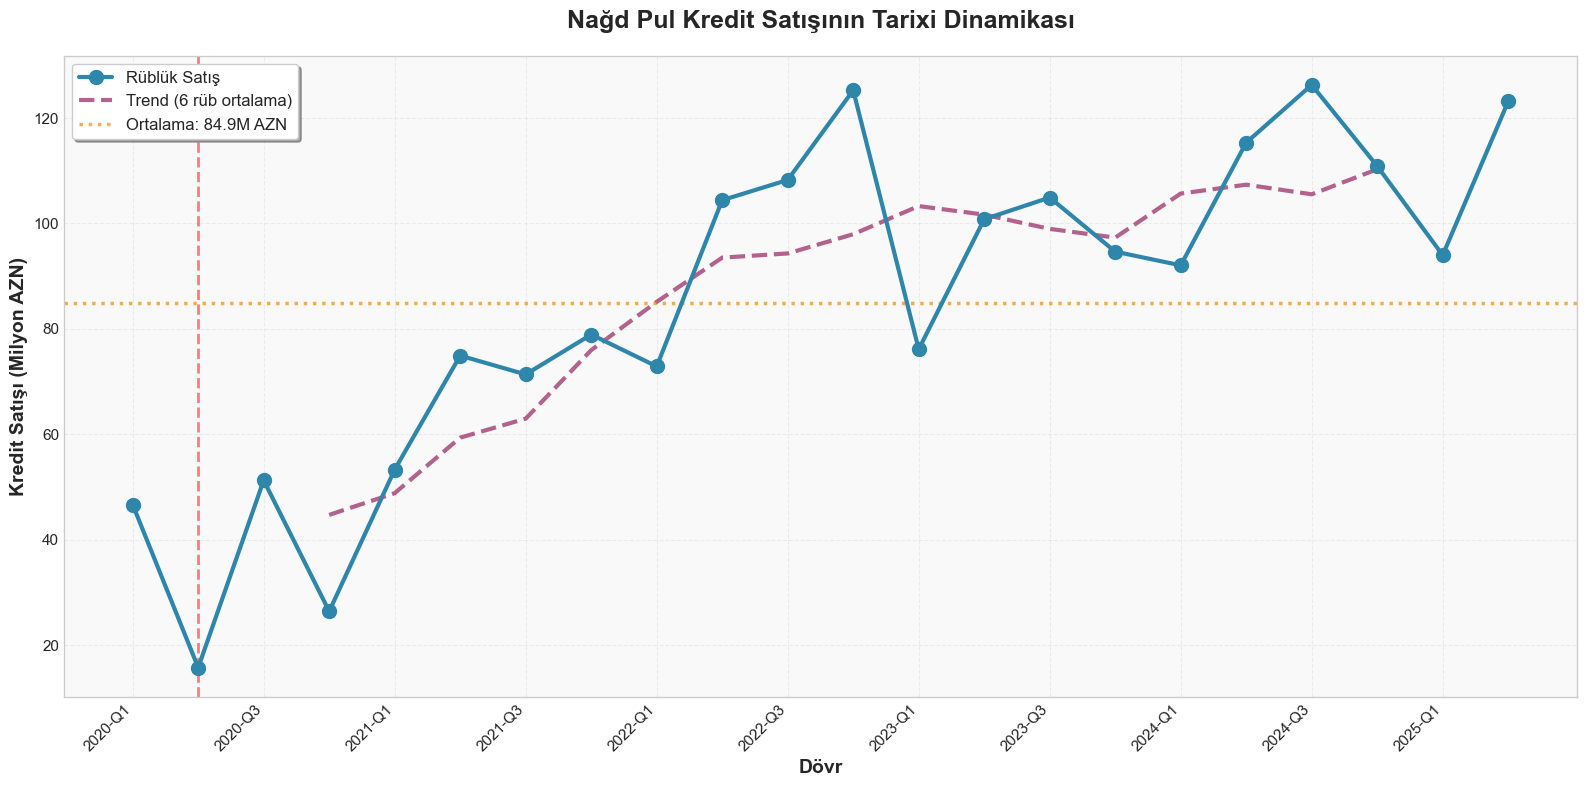

✅ Qrafik 1 yaradıldı: Tarixi Dinamika


In [7]:
# GRAFİK 1: Kredit Satışının Tarixi Dinamikası
fig, ax = plt.subplots(figsize=(16, 8))

# Əsas xətt
ax.plot(df['Time_Index'], df[target]/1e6, 
        marker='o', linewidth=3, markersize=10, 
        color='#2E86AB', label='Rüblük Satış', zorder=3)

# Trend xətti (6 rüblük hərəkətli ortalama)
ma_6 = df[target].rolling(window=6, center=True).mean()
ax.plot(df['Time_Index'], ma_6/1e6, 
        linestyle='--', linewidth=3, color='#A23B72', 
        label='Trend (6 rüb ortalama)', alpha=0.8, zorder=2)

# Ortalama xətti
avg = df[target].mean()
ax.axhline(y=avg/1e6, color='#F18F01', linestyle=':', linewidth=2.5, 
           label=f'Ortalama: {avg/1e6:.1f}M AZN', alpha=0.7)

# COVID təsiri
covid_idx = df[df['Year'] == 2020].index[1]
ax.axvline(x=df.loc[covid_idx, 'Time_Index'], color='red', 
           linestyle='--', linewidth=2, alpha=0.5)
ax.text(df.loc[covid_idx, 'Time_Index'], ax.get_ylim()[1]*0.95, 
        'COVID-19', ha='center', fontsize=11, color='red', weight='bold')

# Rüb adları
labels = [f"{int(row['Year'])}-Q{int(row['Quarter'])}" 
          for _, row in df.iloc[::2].iterrows()]
ax.set_xticks(df.iloc[::2]['Time_Index'])
ax.set_xticklabels(labels, rotation=45, ha='right')

ax.set_title('Nağd Pul Kredit Satışının Tarixi Dinamikası', 
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Dövr', fontsize=14, fontweight='bold')
ax.set_ylabel('Kredit Satışı (Milyon AZN)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#F9F9F9')

plt.tight_layout()
plt.savefig('images/01_tarixi_dinamika.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 1 yaradıldı: Tarixi Dinamika")

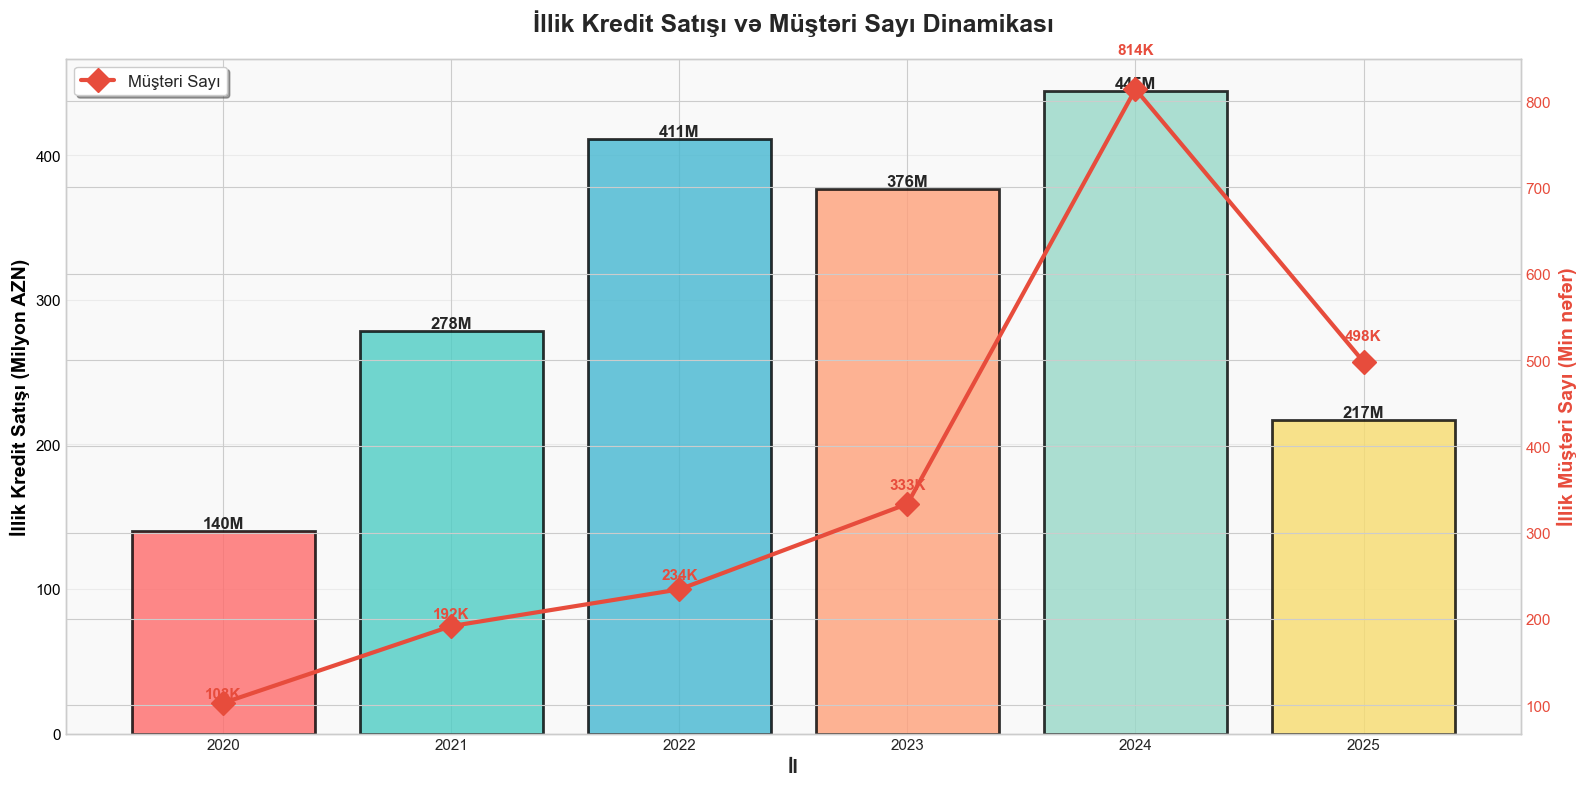

✅ Qrafik 2 yaradıldı: İllik Müqayisə


In [8]:
# GRAFİK 2: İllər üzrə Müqayisə (Bar + Line)
fig, ax1 = plt.subplots(figsize=(16, 8))

yearly_sum = df.groupby('Year')[target].sum() / 1e6
yearly_count = df.groupby('Year')['Müştəri_sayı'].sum() / 1000

# Bar chart
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
bars = ax1.bar(yearly_sum.index, yearly_sum.values, 
               color=colors[:len(yearly_sum)], alpha=0.8, edgecolor='black', linewidth=2)

# Dəyərləri göstər
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}M',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_xlabel('İl', fontsize=14, fontweight='bold')
ax1.set_ylabel('İllik Kredit Satışı (Milyon AZN)', fontsize=14, fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# İkinci ox - müştəri sayı
ax2 = ax1.twinx()
line = ax2.plot(yearly_count.index, yearly_count.values, 
                color='#E74C3C', marker='D', linewidth=3, markersize=12, 
                label='Müştəri Sayı', zorder=10)
ax2.set_ylabel('İllik Müştəri Sayı (Min nəfər)', fontsize=14, fontweight='bold', color='#E74C3C')
ax2.tick_params(axis='y', labelcolor='#E74C3C')

# Müştəri dəyərlərini göstər
for x, y in zip(yearly_count.index, yearly_count.values):
    ax2.text(x, y*1.05, f'{y:.0f}K', ha='center', fontsize=11, 
            fontweight='bold', color='#E74C3C')

ax1.set_title('İllik Kredit Satışı və Müştəri Sayı Dinamikası', 
              fontsize=18, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_facecolor('#F9F9F9')
ax2.legend(loc='upper left', fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.savefig('images/02_illik_muqayise.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 2 yaradıldı: İllik Müqayisə")

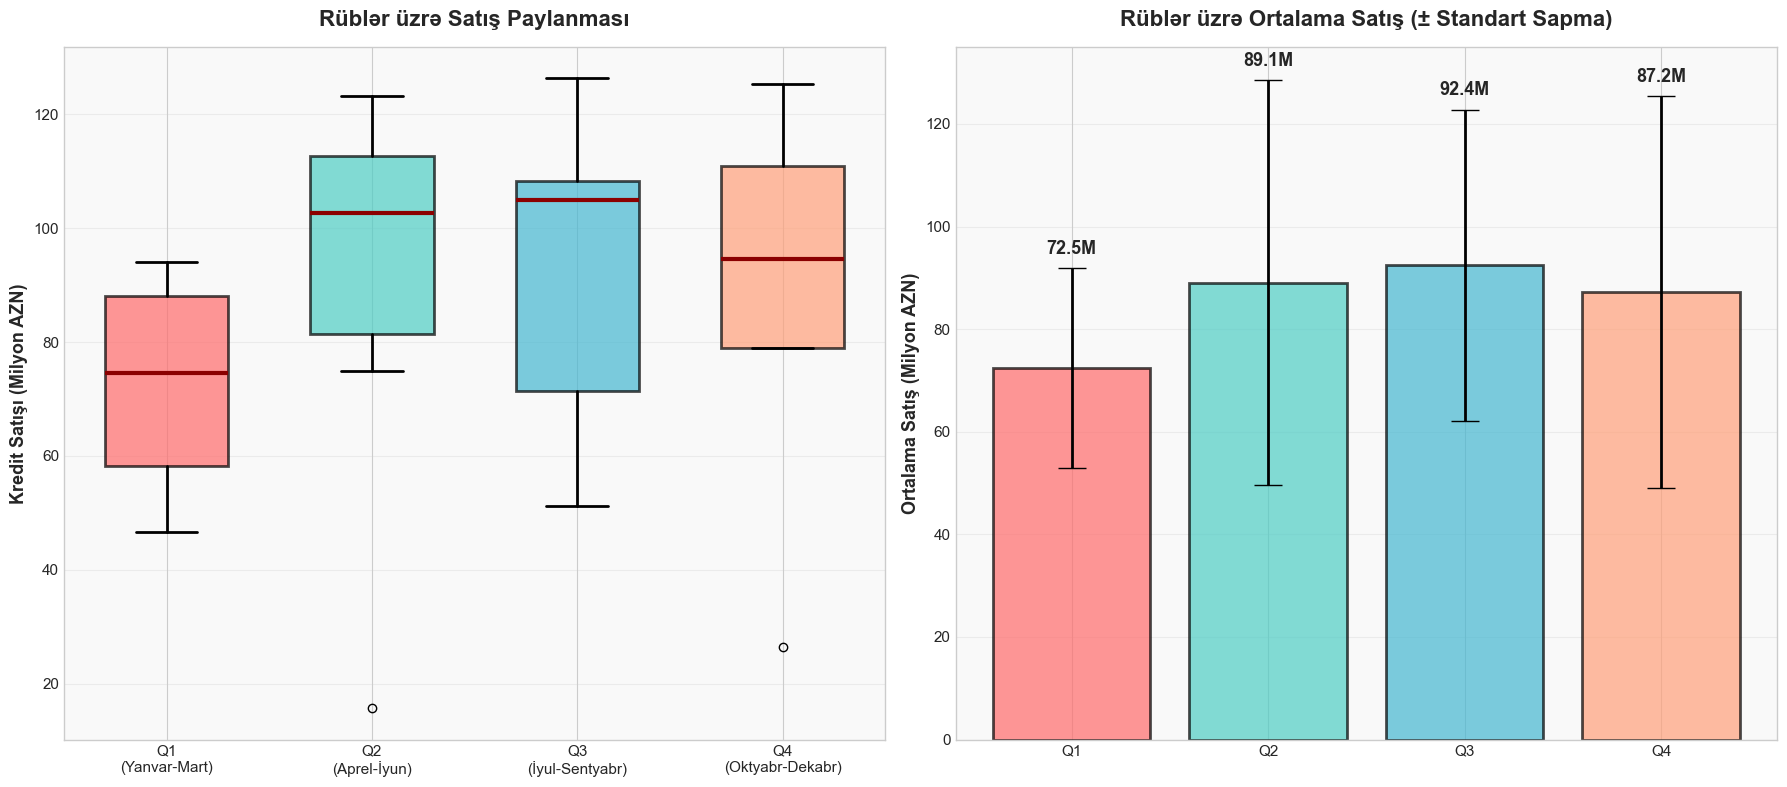

✅ Qrafik 3 yaradıldı: Rüblük Mövsümilik


In [9]:
# GRAFİK 3: Rüblük Mövsümilik Analizi
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Sol panel: Box plot
ax1 = axes[0]
quarters_data = [df[df['Quarter']==q][target].values/1e6 for q in [1, 2, 3, 4]]
bp = ax1.boxplot(quarters_data, labels=['Q1\n(Yanvar-Mart)', 'Q2\n(Aprel-İyun)', 
                                          'Q3\n(İyul-Sentyabr)', 'Q4\n(Oktyabr-Dekabr)'], 
                 patch_artist=True, widths=0.6)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(2)

for whisker in bp['whiskers']:
    whisker.set(linewidth=2, color='black')
for cap in bp['caps']:
    cap.set(linewidth=2, color='black')
for median in bp['medians']:
    median.set(linewidth=3, color='darkred')

ax1.set_title('Rüblər üzrə Satış Paylanması', fontsize=16, fontweight='bold', pad=15)
ax1.set_ylabel('Kredit Satışı (Milyon AZN)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_facecolor('#F9F9F9')

# Sağ panel: Ortalama satış
ax2 = axes[1]
quarterly_avg = df.groupby('Quarter')[target].mean() / 1e6
quarterly_std = df.groupby('Quarter')[target].std() / 1e6

bars = ax2.bar([f'Q{i}' for i in quarterly_avg.index], quarterly_avg.values, 
               color=colors, edgecolor='black', linewidth=2, alpha=0.7,
               yerr=quarterly_std.values, capsize=10, error_kw={'linewidth': 2})

# Dəyərləri göstər
for i, (bar, val) in enumerate(zip(bars, quarterly_avg.values)):
    ax2.text(i, val+quarterly_std.values[i]+2, f'{val:.1f}M',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

ax2.set_title('Rüblər üzrə Ortalama Satış (± Standart Sapma)', 
              fontsize=16, fontweight='bold', pad=15)
ax2.set_ylabel('Ortalama Satış (Milyon AZN)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_facecolor('#F9F9F9')

plt.tight_layout()
plt.savefig('images/03_rubluk_movsumillik.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 3 yaradıldı: Rüblük Mövsümilik")

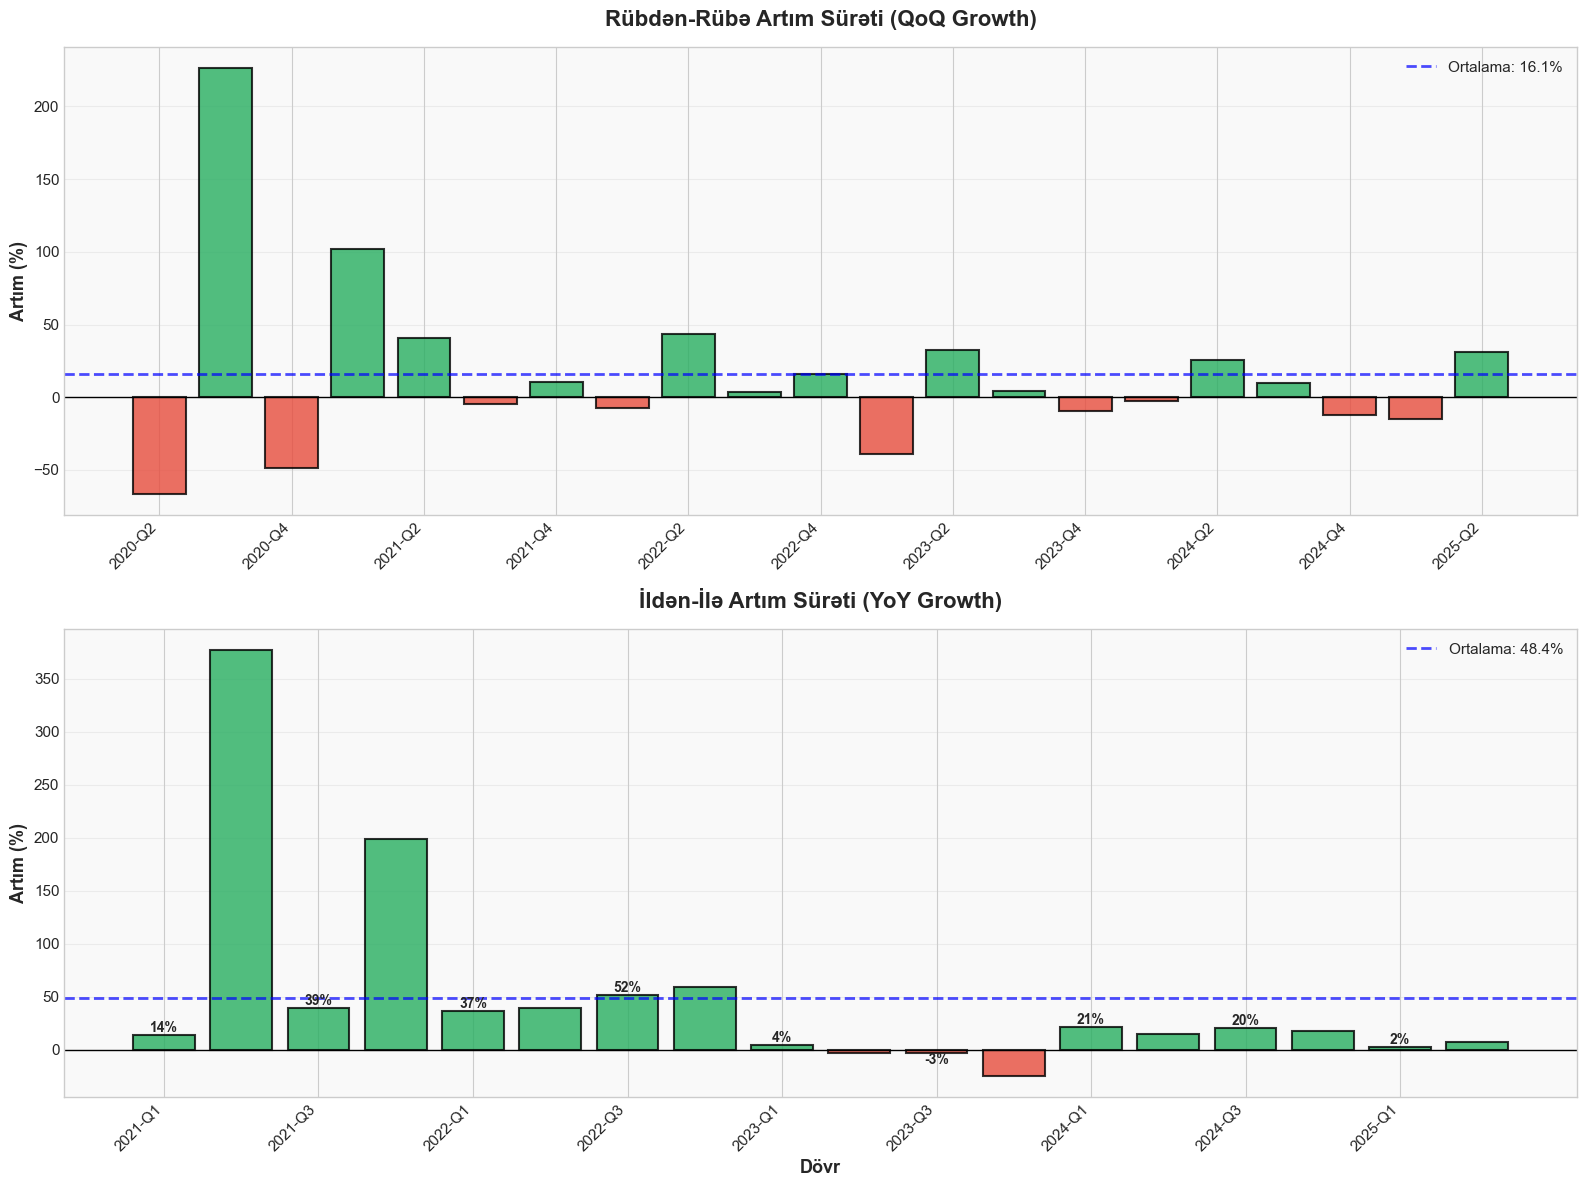

✅ Qrafik 4 yaradıldı: Artım Sürətləri


In [10]:
# GRAFİK 4: Artım Sürətləri
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Üst panel: Rübdən-rübə artım
ax1 = axes[0]
qoq_growth = df[target].pct_change() * 100
colors_qoq = ['#27AE60' if x > 0 else '#E74C3C' for x in qoq_growth]
bars1 = ax1.bar(df['Time_Index'][1:], qoq_growth[1:], 
                color=colors_qoq[1:], edgecolor='black', linewidth=1.5, alpha=0.8)

ax1.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax1.axhline(y=qoq_growth.mean(), color='blue', linestyle='--', linewidth=2, 
            label=f'Ortalama: {qoq_growth.mean():.1f}%', alpha=0.7)

# Rüb adları
labels = [f"{int(row['Year'])}-Q{int(row['Quarter'])}" 
          for _, row in df.iloc[1::2].iterrows()]
ax1.set_xticks(df.iloc[1::2]['Time_Index'])
ax1.set_xticklabels(labels, rotation=45, ha='right')

ax1.set_title('Rübdən-Rübə Artım Sürəti (QoQ Growth)', 
              fontsize=16, fontweight='bold', pad=15)
ax1.set_ylabel('Artım (%)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_facecolor('#F9F9F9')

# Alt panel: İldən-ilə artım
ax2 = axes[1]
yoy_growth = df[target].pct_change(periods=4) * 100
colors_yoy = ['#27AE60' if x > 0 else '#E74C3C' for x in yoy_growth]
bars2 = ax2.bar(df['Time_Index'][4:], yoy_growth[4:], 
                color=colors_yoy[4:], edgecolor='black', linewidth=1.5, alpha=0.8)

ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.axhline(y=yoy_growth.mean(), color='blue', linestyle='--', linewidth=2, 
            label=f'Ortalama: {yoy_growth.mean():.1f}%', alpha=0.7)

# Dəyərləri göstər (ancaq hər ikincini)
for i, (idx, val) in enumerate(zip(df['Time_Index'][4:], yoy_growth[4:])):
    if i % 2 == 0:
        ax2.text(idx, val, f'{val:.0f}%',
                ha='center', va='bottom' if val > 0 else 'top', 
                fontsize=10, fontweight='bold')

labels = [f"{int(row['Year'])}-Q{int(row['Quarter'])}" 
          for _, row in df.iloc[4::2].iterrows()]
ax2.set_xticks(df.iloc[4::2]['Time_Index'])
ax2.set_xticklabels(labels, rotation=45, ha='right')

ax2.set_title('İldən-İlə Artım Sürəti (YoY Growth)', 
              fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('Dövr', fontsize=13, fontweight='bold')
ax2.set_ylabel('Artım (%)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_facecolor('#F9F9F9')

plt.tight_layout()
plt.savefig('images/04_artim_suretleri.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 4 yaradıldı: Artım Sürətləri")

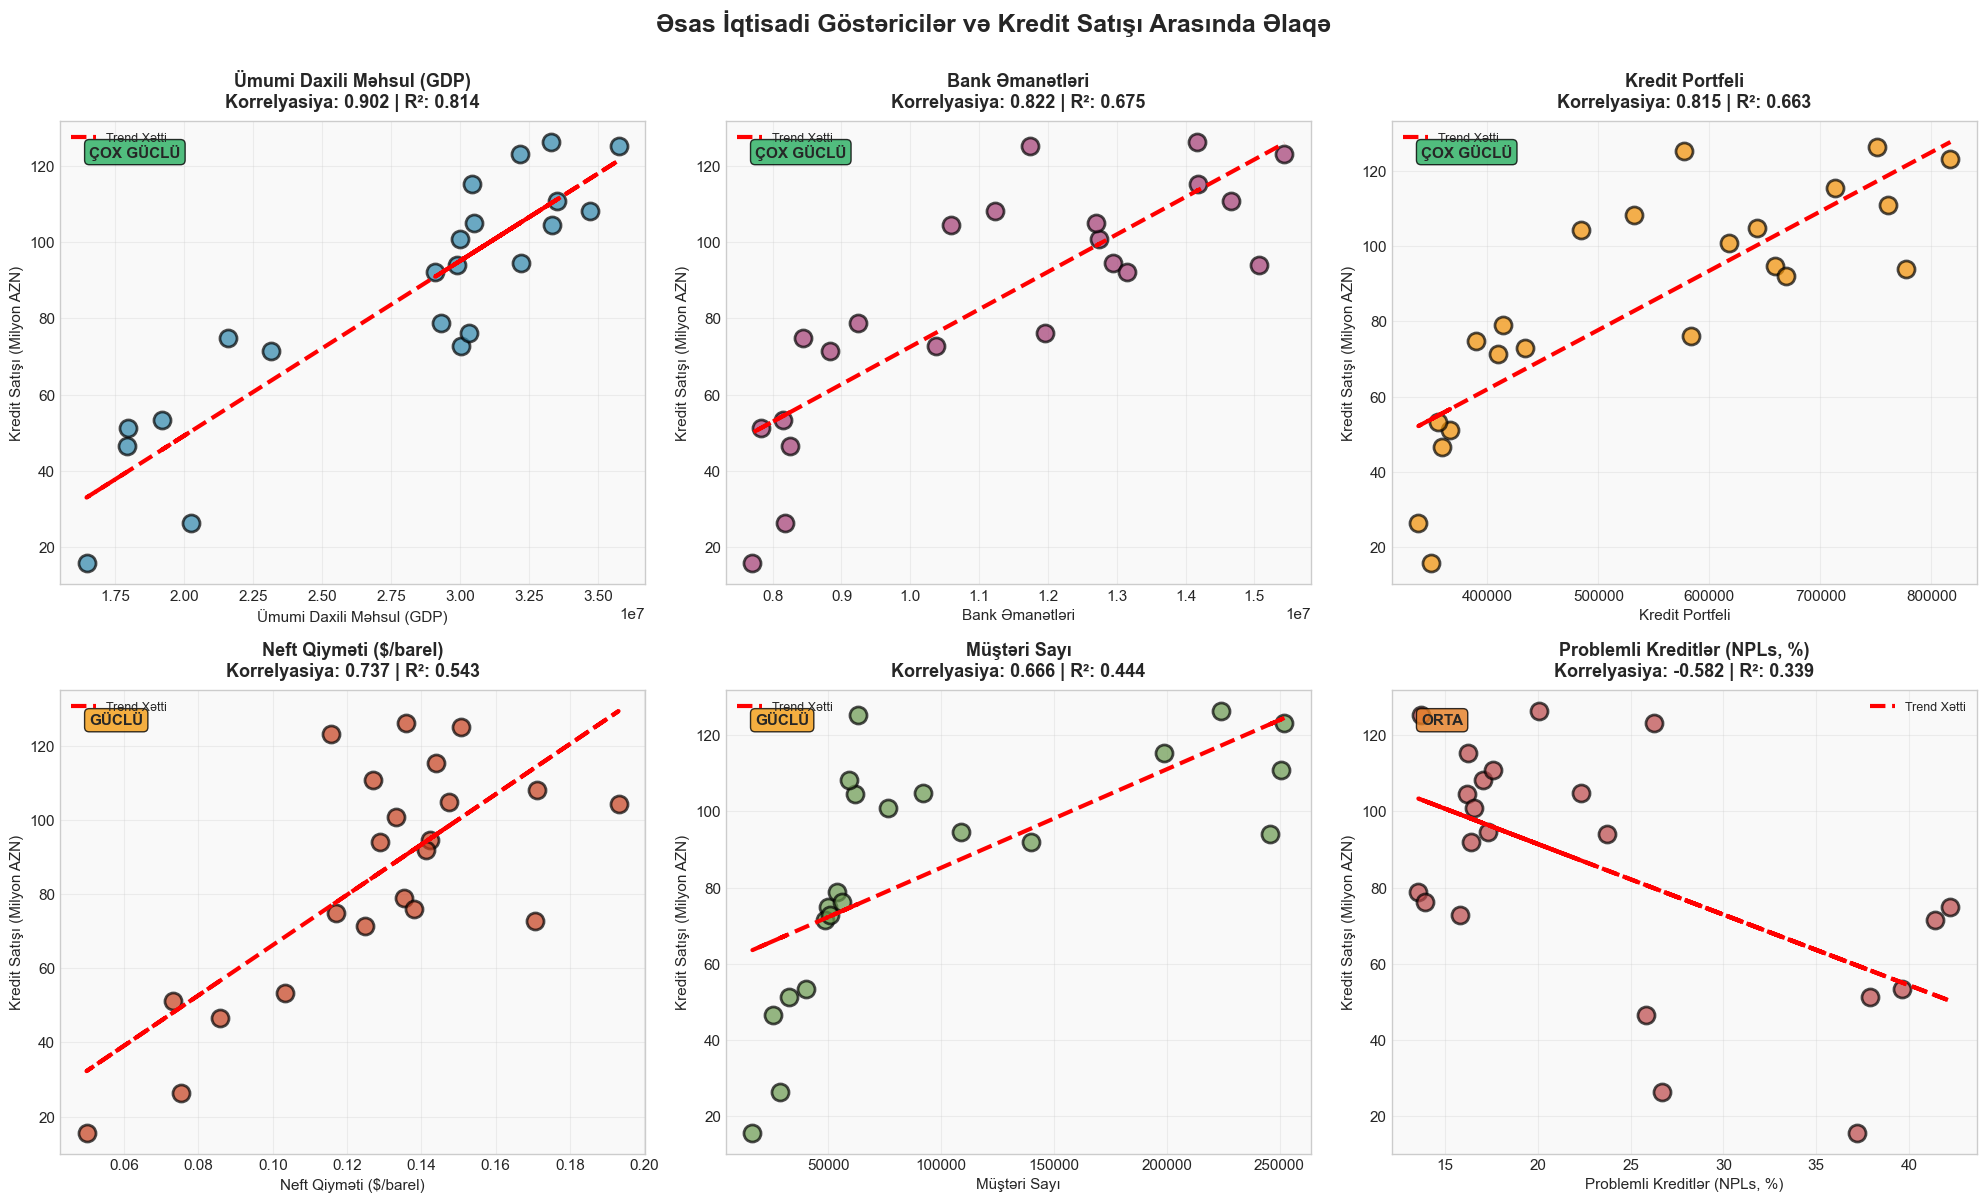

✅ Qrafik 5 yaradıldı: İqtisadi Əlaqələr


In [11]:
# GRAFİK 5: Əsas İqtisadi Göstəricilər ilə Əlaqə
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

key_features = [
    ('GDP', 'Ümumi Daxili Məhsul (GDP)', '#2E86AB'),
    ('Əhalinin_banklardakı_əmanətləri', 'Bank Əmanətləri', '#A23B72'),
    ('Portfel', 'Kredit Portfeli', '#F18F01'),
    ('Oil_Price', 'Neft Qiyməti ($/barel)', '#C73E1D'),
    ('Müştəri_sayı', 'Müştəri Sayı', '#6A994E'),
    ('NPLs', 'Problemli Kreditlər (NPLs, %)', '#BC4749')
]

for idx, (feature, title, color) in enumerate(key_features):
    ax = axes[idx]
    
    # Data hazırla
    df_plot = df[[feature, target]].dropna()
    x = df_plot[feature]
    y = df_plot[target] / 1e6
    
    # Scatter plot
    ax.scatter(x, y, alpha=0.7, s=150, c=color, edgecolors='black', linewidth=2)
    
    # Trend xətti
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), "r--", linewidth=3, label='Trend Xətti')
    
    # Korrelyasiya
    corr = df_plot[feature].corr(df_plot[target])
    
    # R² (determinasiya əmsalı)
    y_pred = p(x)
    ss_tot = np.sum((y - np.mean(y))**2)
    ss_res = np.sum((y - y_pred)**2)
    r2 = 1 - (ss_res / ss_tot)
    
    ax.set_title(f'{title}\nKorrelyasiya: {corr:.3f} | R²: {r2:.3f}', 
                fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel(title, fontsize=11)
    ax.set_ylabel('Kredit Satışı (Milyon AZN)', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    ax.set_facecolor('#F9F9F9')
    
    # Əlaqə gücünü göstər
    if abs(corr) > 0.8:
        strength = "ÇOX GÜCLÜ"
        box_color = '#27AE60'
    elif abs(corr) > 0.6:
        strength = "GÜCLÜ"
        box_color = '#F39C12'
    elif abs(corr) > 0.4:
        strength = "ORTA"
        box_color = '#E67E22'
    else:
        strength = "ZƏIF"
        box_color = '#95A5A6'
    
    ax.text(0.05, 0.95, strength, transform=ax.transAxes, 
            fontsize=11, fontweight='bold', va='top',
            bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.8))

plt.suptitle('Əsas İqtisadi Göstəricilər və Kredit Satışı Arasında Əlaqə', 
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('images/05_iqtisadi_elaqeler.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 5 yaradıldı: İqtisadi Əlaqələr")

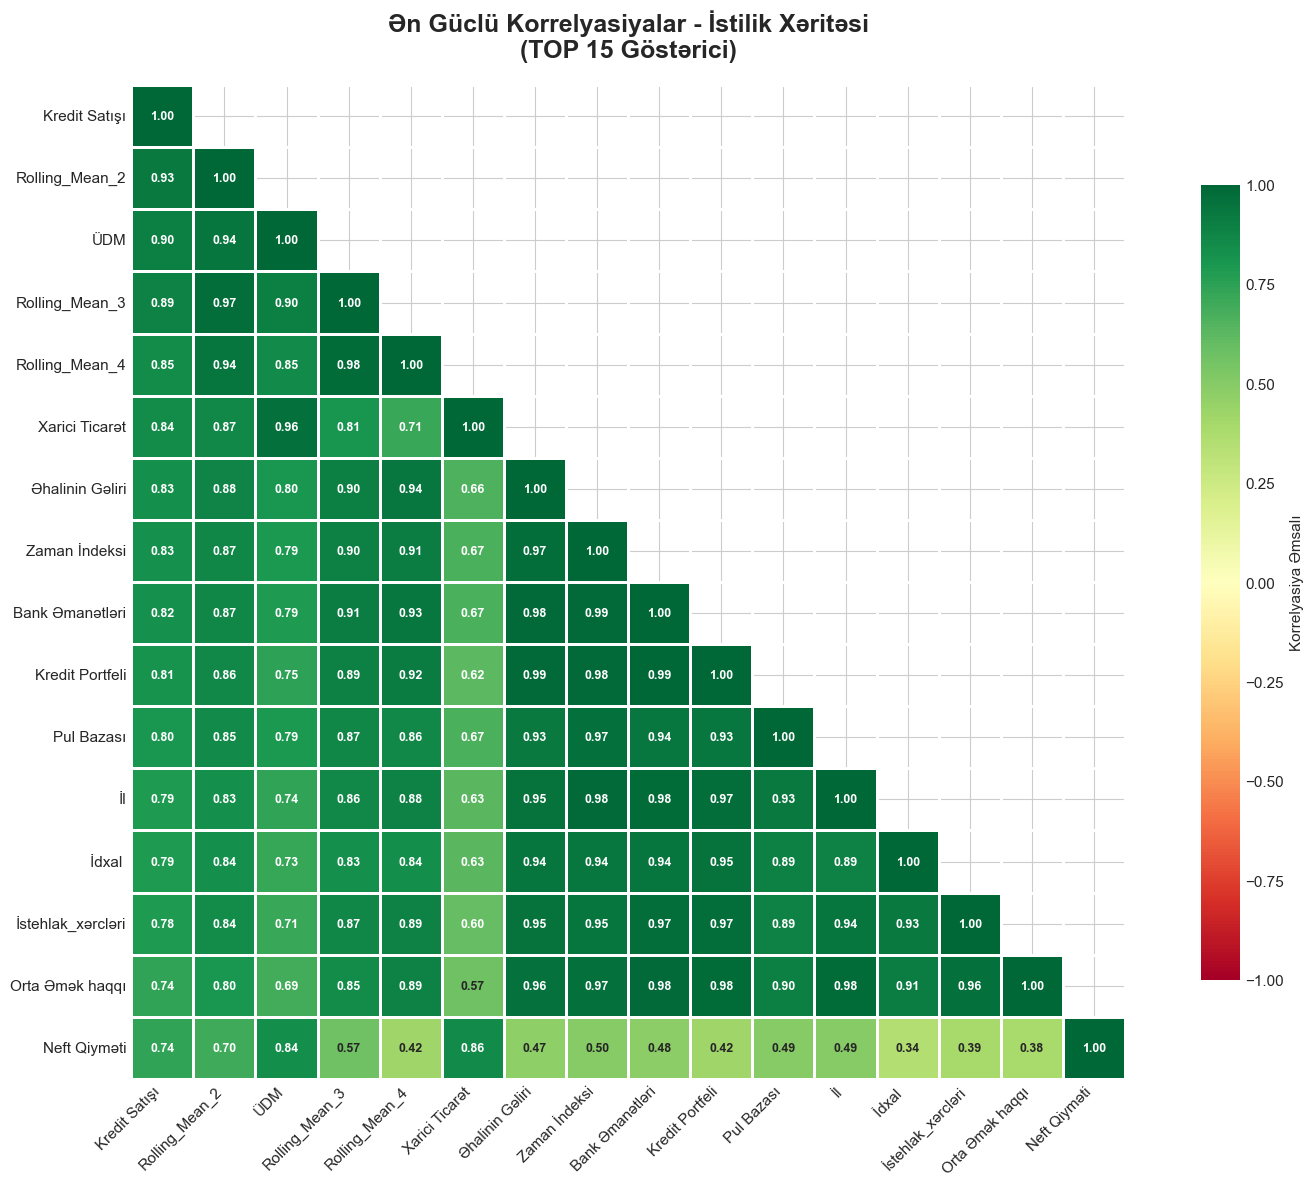

✅ Qrafik 6 yaradıldı: Korrelyasiya Xəritəsi


In [12]:
# GRAFİK 6: Korrelyasiya İstilik Xəritəsi (TOP 15)
fig, ax = plt.subplots(figsize=(16, 12))

# TOP 15 korrelyasiyalı xüsusiyyət
top_features = correlations.abs().sort_values(ascending=False).head(16).index.tolist()
if target in top_features:
    top_features.remove(target)
else:
    top_features = top_features[:15]

top_features = [target] + top_features[:15]

corr_matrix = df[top_features].corr()

# Azərbaycanca adlar
feature_names = {
    'Nağd_pul_kredit_satışı': 'Kredit Satışı',
    'GDP': 'ÜDM',
    'Əhalinin_banklardakı_əmanətləri': 'Bank Əmanətləri',
    'Portfel': 'Kredit Portfeli',
    'Oil_Price': 'Neft Qiyməti',
    'Müştəri_sayı': 'Müştəri Sayı',
    'NPLs': 'Problemli Kreditlər',
    'Time_Index': 'Zaman İndeksi',
    'Year': 'İl',
    'Pul_bazası': 'Pul Bazası',
    'Xarici_ticarət_dövriyyəsi': 'Xarici Ticarət',
    'İxrac': 'İxrac',
    'Əhalinin_nominal_gəlirləri': 'Əhalinin Gəliri',
    'Mənzil_qiymətləri': 'Mənzil Qiymətləri',
    'Kumulyativ_satish': 'Kumulyativ Satış',
    'Orta_aylıq_əməkhaqqı': 'Orta Əmək haqqı',
    'İdxal': 'İdxal'
}

labels = [feature_names.get(f, f) for f in top_features]

# İstilik xəritəsi
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, square=True, linewidths=2, 
            cbar_kws={"shrink": 0.8, "label": "Korrelyasiya Əmsalı"},
            xticklabels=labels, yticklabels=labels, ax=ax,
            vmin=-1, vmax=1, annot_kws={"size": 9, "weight": "bold"})

ax.set_title('Ən Güclü Korrelyasiyalar - İstilik Xəritəsi\n(TOP 15 Göstərici)', 
             fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.savefig('images/06_korrelyasiya_xeritesi.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 6 yaradıldı: Korrelyasiya Xəritəsi")

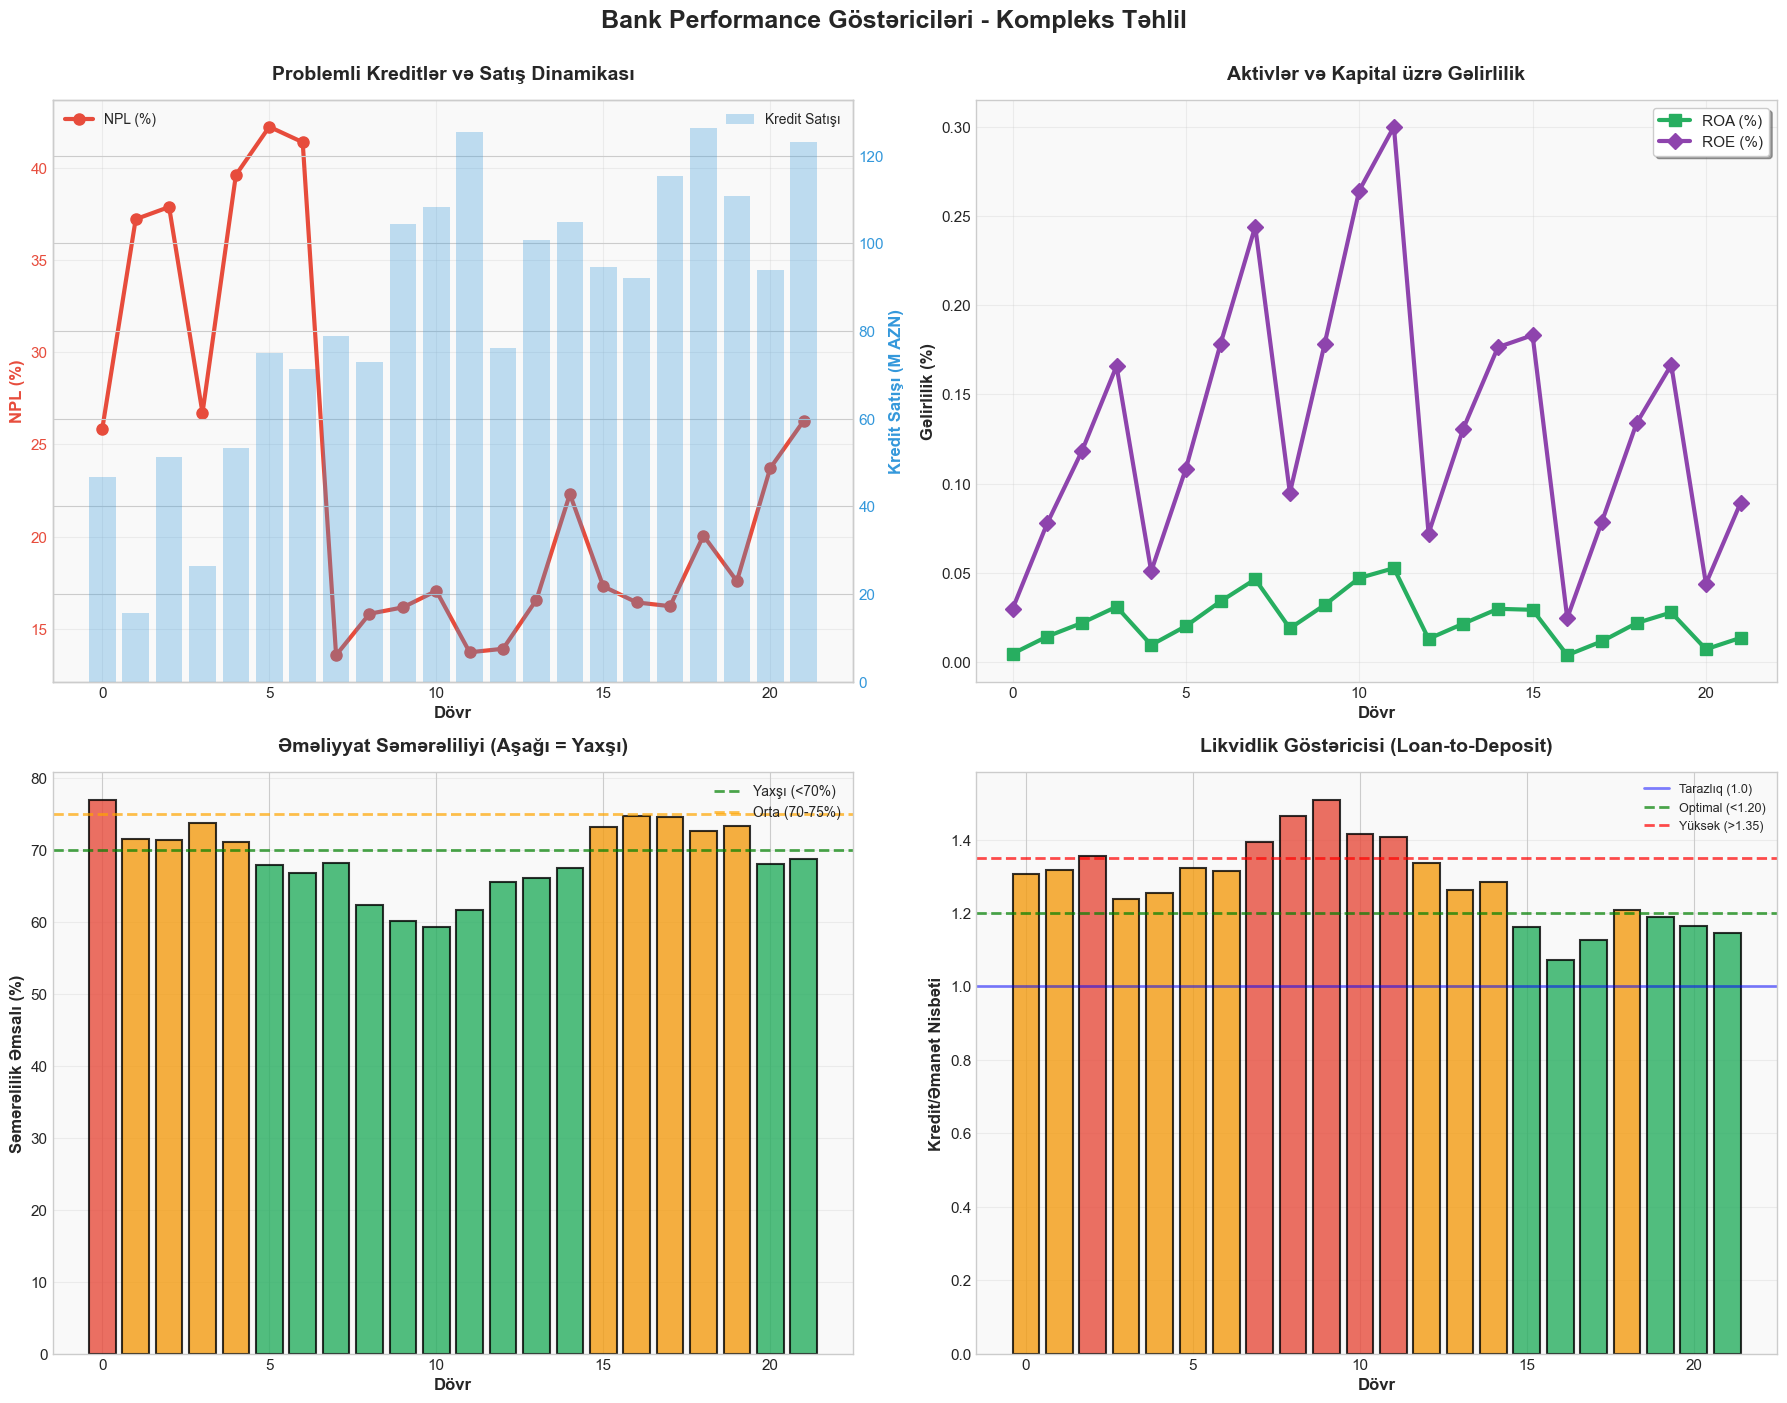

✅ Qrafik 7 yaradıldı: Bank Performance


In [13]:
# GRAFİK 7: Bank Performance Göstəriciləri
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 7.1: NPLs dinamikası
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()

ax1.plot(df['Time_Index'], df['NPLs'], 
         marker='o', linewidth=3, markersize=8, color='#E74C3C', label='NPL (%)')
ax1_twin.bar(df['Time_Index'], df[target]/1e6, alpha=0.3, color='#3498DB', label='Kredit Satışı')

ax1.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax1.set_ylabel('NPL (%)', fontsize=12, fontweight='bold', color='#E74C3C')
ax1_twin.set_ylabel('Kredit Satışı (M AZN)', fontsize=12, fontweight='bold', color='#3498DB')
ax1.set_title('Problemli Kreditlər və Satış Dinamikası', fontsize=14, fontweight='bold', pad=15)
ax1.tick_params(axis='y', labelcolor='#E74C3C')
ax1_twin.tick_params(axis='y', labelcolor='#3498DB')
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#F9F9F9')
ax1.legend(loc='upper left', fontsize=10)
ax1_twin.legend(loc='upper right', fontsize=10)

# 7.2: ROA və ROE (Note: ROA has trailing space in column name)
ax2 = axes[0, 1]
ax2.plot(df['Time_Index'], df['ROA '], 
         marker='s', linewidth=3, markersize=8, color='#27AE60', label='ROA (%)')
ax2.plot(df['Time_Index'], df['ROE'], 
         marker='D', linewidth=3, markersize=8, color='#8E44AD', label='ROE (%)')

ax2.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax2.set_ylabel('Gəlirlilik (%)', fontsize=12, fontweight='bold')
ax2.set_title('Aktivlər və Kapital üzrə Gəlirlilik', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='best', frameon=True, shadow=True)
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#F9F9F9')

# 7.3: Efficiency Ratio
ax3 = axes[1, 0]
colors_eff = ['#27AE60' if x < 0.70 else '#F39C12' if x < 0.75 else '#E74C3C' 
              for x in df['Efficiency_Ratio']]
ax3.bar(df['Time_Index'], df['Efficiency_Ratio']*100, 
        color=colors_eff, edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.axhline(y=70, color='green', linestyle='--', linewidth=2, label='Yaxşı (<70%)', alpha=0.7)
ax3.axhline(y=75, color='orange', linestyle='--', linewidth=2, label='Orta (70-75%)', alpha=0.7)

ax3.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax3.set_ylabel('Səmərəlilik Əmsalı (%)', fontsize=12, fontweight='bold')
ax3.set_title('Əməliyyat Səmərəliliyi (Aşağı = Yaxşı)', fontsize=14, fontweight='bold', pad=15)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_facecolor('#F9F9F9')

# 7.4: Loan-to-Deposit Ratio
ax4 = axes[1, 1]
colors_ltd = ['#E74C3C' if x > 1.35 else '#F39C12' if x > 1.20 else '#27AE60' 
              for x in df['Loan-to-Deposit_Ratio']]
ax4.bar(df['Time_Index'], df['Loan-to-Deposit_Ratio'], 
        color=colors_ltd, edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.axhline(y=1.0, color='blue', linestyle='-', linewidth=2, label='Tarazlıq (1.0)', alpha=0.5)
ax4.axhline(y=1.20, color='green', linestyle='--', linewidth=2, label='Optimal (<1.20)', alpha=0.7)
ax4.axhline(y=1.35, color='red', linestyle='--', linewidth=2, label='Yüksək (>1.35)', alpha=0.7)

ax4.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax4.set_ylabel('Kredit/Əmanət Nisbəti', fontsize=12, fontweight='bold')
ax4.set_title('Likvidlik Göstəricisi (Loan-to-Deposit)', fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=9, loc='best')
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_facecolor('#F9F9F9')

plt.suptitle('Bank Performance Göstəriciləri - Kompleks Təhlil', 
             fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('images/07_bank_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 7 yaradıldı: Bank Performance")

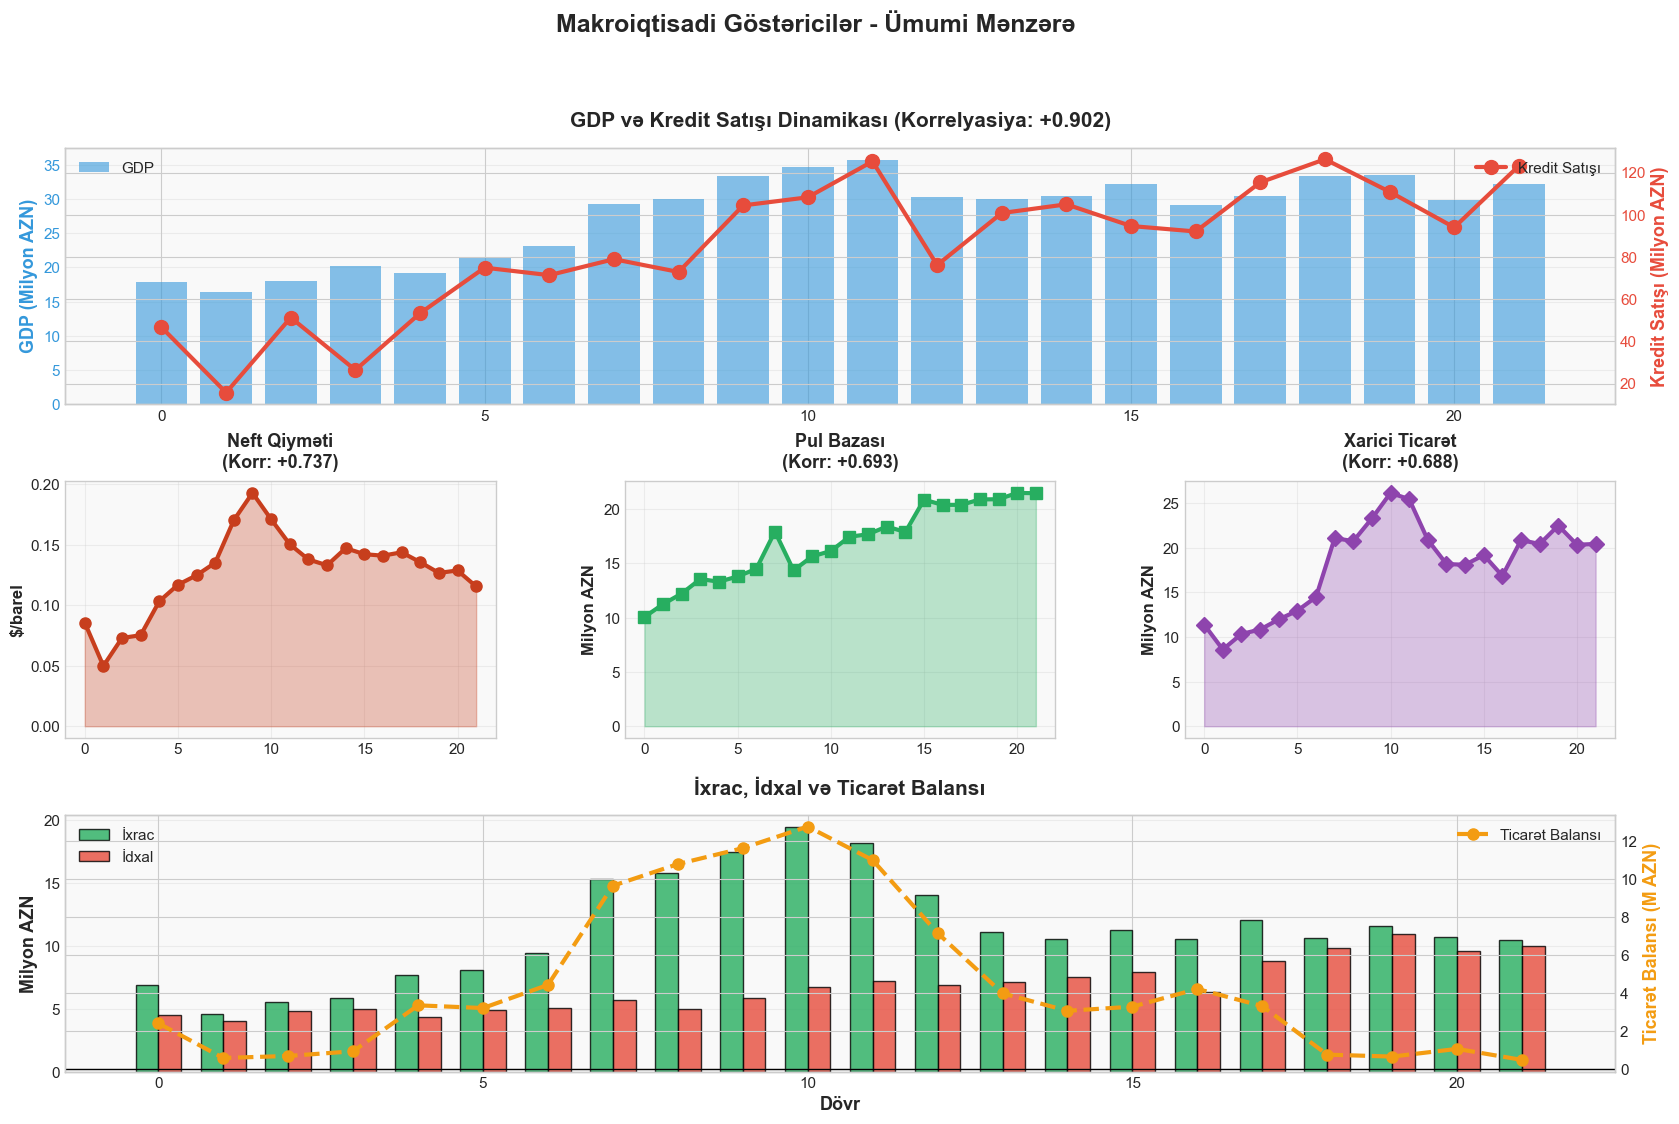

✅ Qrafik 8 yaradıldı: Makroiqtisadi Panel


In [14]:
# GRAFİK 8: Makroiqtisadi Göstəricilər Paneli
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 8.1: GDP və Kredit Satışı
ax1 = fig.add_subplot(gs[0, :])
ax1_twin = ax1.twinx()

ax1.bar(df['Time_Index'], df['GDP']/1e6, alpha=0.6, color='#3498DB', label='GDP')
ax1_twin.plot(df['Time_Index'], df[target]/1e6, 
              marker='o', linewidth=3, markersize=10, color='#E74C3C', label='Kredit Satışı')

ax1.set_ylabel('GDP (Milyon AZN)', fontsize=13, fontweight='bold', color='#3498DB')
ax1_twin.set_ylabel('Kredit Satışı (Milyon AZN)', fontsize=13, fontweight='bold', color='#E74C3C')
ax1.set_title('GDP və Kredit Satışı Dinamikası (Korrelyasiya: +0.902)', 
              fontsize=15, fontweight='bold', pad=15)
ax1.tick_params(axis='y', labelcolor='#3498DB')
ax1_twin.tick_params(axis='y', labelcolor='#E74C3C')
ax1.legend(loc='upper left', fontsize=11)
ax1_twin.legend(loc='upper right', fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_facecolor('#F9F9F9')

# 8.2: Neft Qiyməti
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(df['Time_Index'], df['Oil_Price'], 
         marker='o', linewidth=3, markersize=8, color='#C73E1D')
ax2.fill_between(df['Time_Index'], df['Oil_Price'], alpha=0.3, color='#C73E1D')
ax2.set_ylabel('$/barel', fontsize=12, fontweight='bold')
ax2.set_title('Neft Qiyməti\n(Korr: +0.737)', fontsize=13, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#F9F9F9')

# 8.3: Pul Bazası
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(df['Time_Index'], df['Pul_bazası']/1e6, 
         marker='s', linewidth=3, markersize=8, color='#27AE60')
ax3.fill_between(df['Time_Index'], df['Pul_bazası']/1e6, alpha=0.3, color='#27AE60')
ax3.set_ylabel('Milyon AZN', fontsize=12, fontweight='bold')
ax3.set_title('Pul Bazası\n(Korr: +0.693)', fontsize=13, fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)
ax3.set_facecolor('#F9F9F9')

# 8.4: Xarici Ticarət
ax4 = fig.add_subplot(gs[1, 2])
ax4.plot(df['Time_Index'], df['Xarici_ticarət_dövriyyəsi']/1e6, 
         marker='D', linewidth=3, markersize=8, color='#8E44AD')
ax4.fill_between(df['Time_Index'], df['Xarici_ticarət_dövriyyəsi']/1e6, 
                 alpha=0.3, color='#8E44AD')
ax4.set_ylabel('Milyon AZN', fontsize=12, fontweight='bold')
ax4.set_title('Xarici Ticarət\n(Korr: +0.688)', fontsize=13, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3)
ax4.set_facecolor('#F9F9F9')

# 8.5: İxrac və İdxal (Note: İdxal has trailing space)
ax5 = fig.add_subplot(gs[2, :])
width = 0.35
x = df['Time_Index']
ax5.bar(x - width/2, df['İxrac']/1e6, width, label='İxrac', 
        color='#27AE60', edgecolor='black', alpha=0.8)
ax5.bar(x + width/2, df['İdxal ']/1e6, width, label='İdxal', 
        color='#E74C3C', edgecolor='black', alpha=0.8)

# Ticarət balansı
balance = (df['İxrac'] - df['İdxal ']) / 1e6
ax5_twin = ax5.twinx()
ax5_twin.plot(x, balance, marker='o', linewidth=3, markersize=8, 
              color='#F39C12', label='Ticarət Balansı', linestyle='--')
ax5_twin.axhline(y=0, color='black', linestyle='-', linewidth=1)

ax5.set_xlabel('Dövr', fontsize=13, fontweight='bold')
ax5.set_ylabel('Milyon AZN', fontsize=13, fontweight='bold')
ax5_twin.set_ylabel('Ticarət Balansı (M AZN)', fontsize=13, fontweight='bold', color='#F39C12')
ax5.set_title('İxrac, İdxal və Ticarət Balansı', fontsize=15, fontweight='bold', pad=15)
ax5.legend(loc='upper left', fontsize=11)
ax5_twin.legend(loc='upper right', fontsize=11)
ax5.grid(True, alpha=0.3, axis='y')
ax5.set_facecolor('#F9F9F9')

plt.suptitle('Makroiqtisadi Göstəricilər - Ümumi Mənzərə', 
             fontsize=18, fontweight='bold', y=0.995)
plt.savefig('images/08_makroiqtisadi_panel.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 8 yaradıldı: Makroiqtisadi Panel")

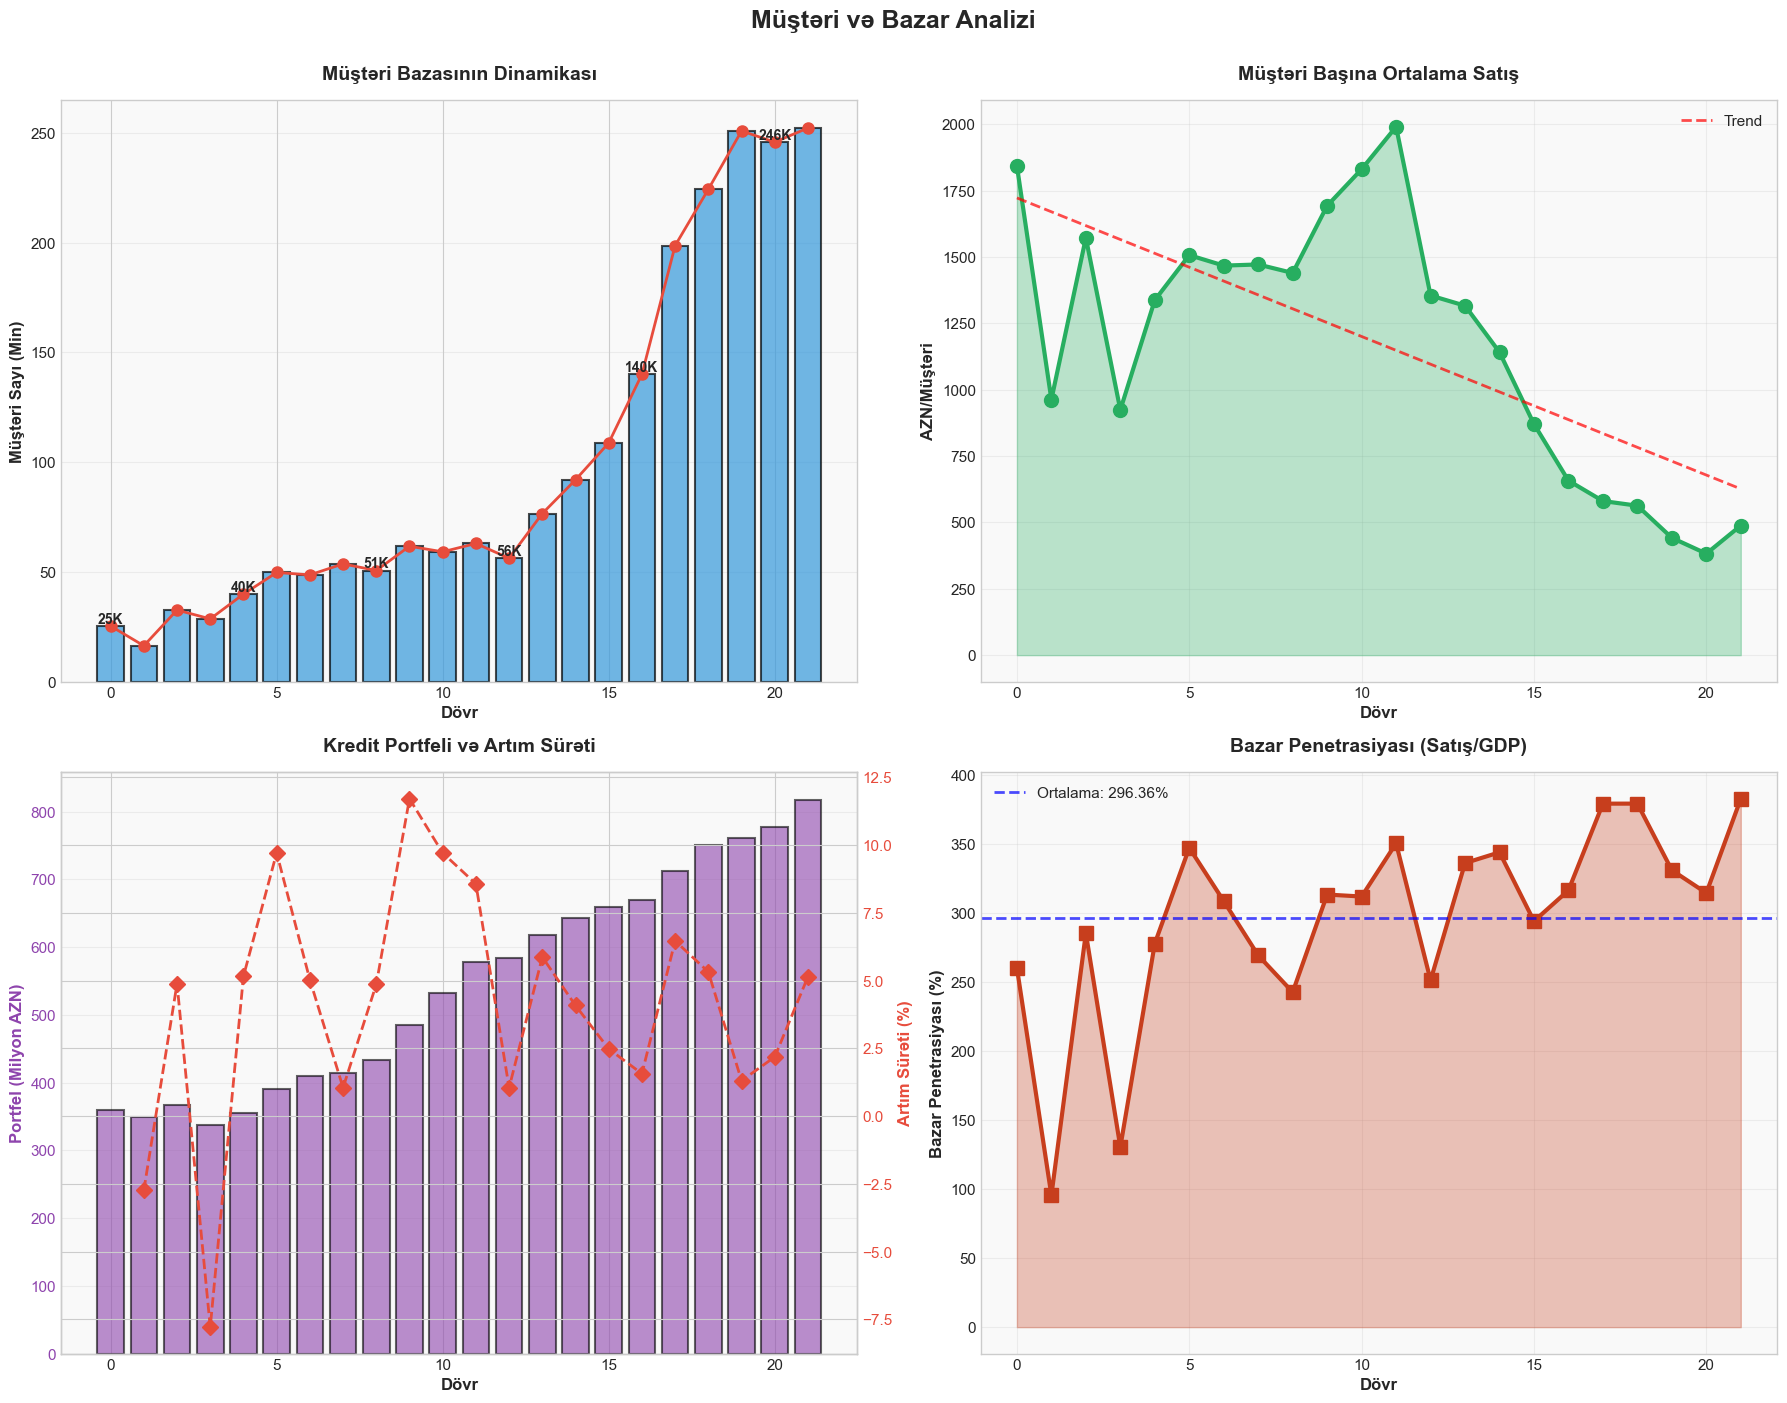

✅ Qrafik 9 yaradıldı: Müştəri və Bazar Analizi


In [15]:
# GRAFİK 9: Rəqabət və Bazar Payı Analizi
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 9.1: Müştəri bazasının artımı
ax1 = axes[0, 0]
ax1.bar(df['Time_Index'], df['Müştəri_sayı']/1000, 
        color='#3498DB', edgecolor='black', linewidth=1.5, alpha=0.7)
ax1.plot(df['Time_Index'], df['Müştəri_sayı']/1000, 
         marker='o', linewidth=2, markersize=8, color='#E74C3C')

for i in range(0, len(df), 4):
    ax1.text(df.iloc[i]['Time_Index'], df.iloc[i]['Müştəri_sayı']/1000, 
            f"{df.iloc[i]['Müştəri_sayı']/1000:.0f}K",
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax1.set_ylabel('Müştəri Sayı (Min)', fontsize=12, fontweight='bold')
ax1.set_title('Müştəri Bazasının Dinamikası', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_facecolor('#F9F9F9')

# 9.2: Müştəri başına ortalama satış
ax2 = axes[0, 1]
avg_per_customer = df[target] / df['Müştəri_sayı']
ax2.plot(df['Time_Index'], avg_per_customer, 
         marker='o', linewidth=3, markersize=10, color='#27AE60')
ax2.fill_between(df['Time_Index'], avg_per_customer, alpha=0.3, color='#27AE60')

# Trend
z = np.polyfit(df['Time_Index'], avg_per_customer, 1)
p = np.poly1d(z)
ax2.plot(df['Time_Index'], p(df['Time_Index']), 
         'r--', linewidth=2, label='Trend', alpha=0.7)

ax2.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax2.set_ylabel('AZN/Müştəri', fontsize=12, fontweight='bold')
ax2.set_title('Müştəri Başına Ortalama Satış', fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_facecolor('#F9F9F9')

# 9.3: Kredit Portfelinin artımı
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()

ax3.bar(df['Time_Index'], df['Portfel']/1000, 
        alpha=0.6, color='#8E44AD', edgecolor='black', linewidth=1.5)
portfolio_growth = df['Portfel'].pct_change() * 100
colors_pg = ['#27AE60' if x > 0 else '#E74C3C' for x in portfolio_growth]
ax3_twin.plot(df['Time_Index'][1:], portfolio_growth[1:], 
              marker='D', linewidth=2, markersize=8, color='#E74C3C', linestyle='--')

ax3.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax3.set_ylabel('Portfel (Milyon AZN)', fontsize=12, fontweight='bold', color='#8E44AD')
ax3_twin.set_ylabel('Artım Sürəti (%)', fontsize=12, fontweight='bold', color='#E74C3C')
ax3.set_title('Kredit Portfeli və Artım Sürəti', fontsize=14, fontweight='bold', pad=15)
ax3.tick_params(axis='y', labelcolor='#8E44AD')
ax3_twin.tick_params(axis='y', labelcolor='#E74C3C')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_facecolor('#F9F9F9')

# 9.4: Bazar penetrasiyası (Satış/GDP)
ax4 = axes[1, 1]
market_penetration = (df[target] / df['GDP']) * 100
ax4.plot(df['Time_Index'], market_penetration, 
         marker='s', linewidth=3, markersize=10, color='#C73E1D')
ax4.fill_between(df['Time_Index'], market_penetration, alpha=0.3, color='#C73E1D')
ax4.axhline(y=market_penetration.mean(), color='blue', linestyle='--', 
            linewidth=2, label=f'Ortalama: {market_penetration.mean():.2f}%', alpha=0.7)

ax4.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax4.set_ylabel('Bazar Penetrasiyası (%)', fontsize=12, fontweight='bold')
ax4.set_title('Bazar Penetrasiyası (Satış/GDP)', fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_facecolor('#F9F9F9')

plt.suptitle('Müştəri və Bazar Analizi', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('images/09_musteri_bazar.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 9 yaradıldı: Müştəri və Bazar Analizi")

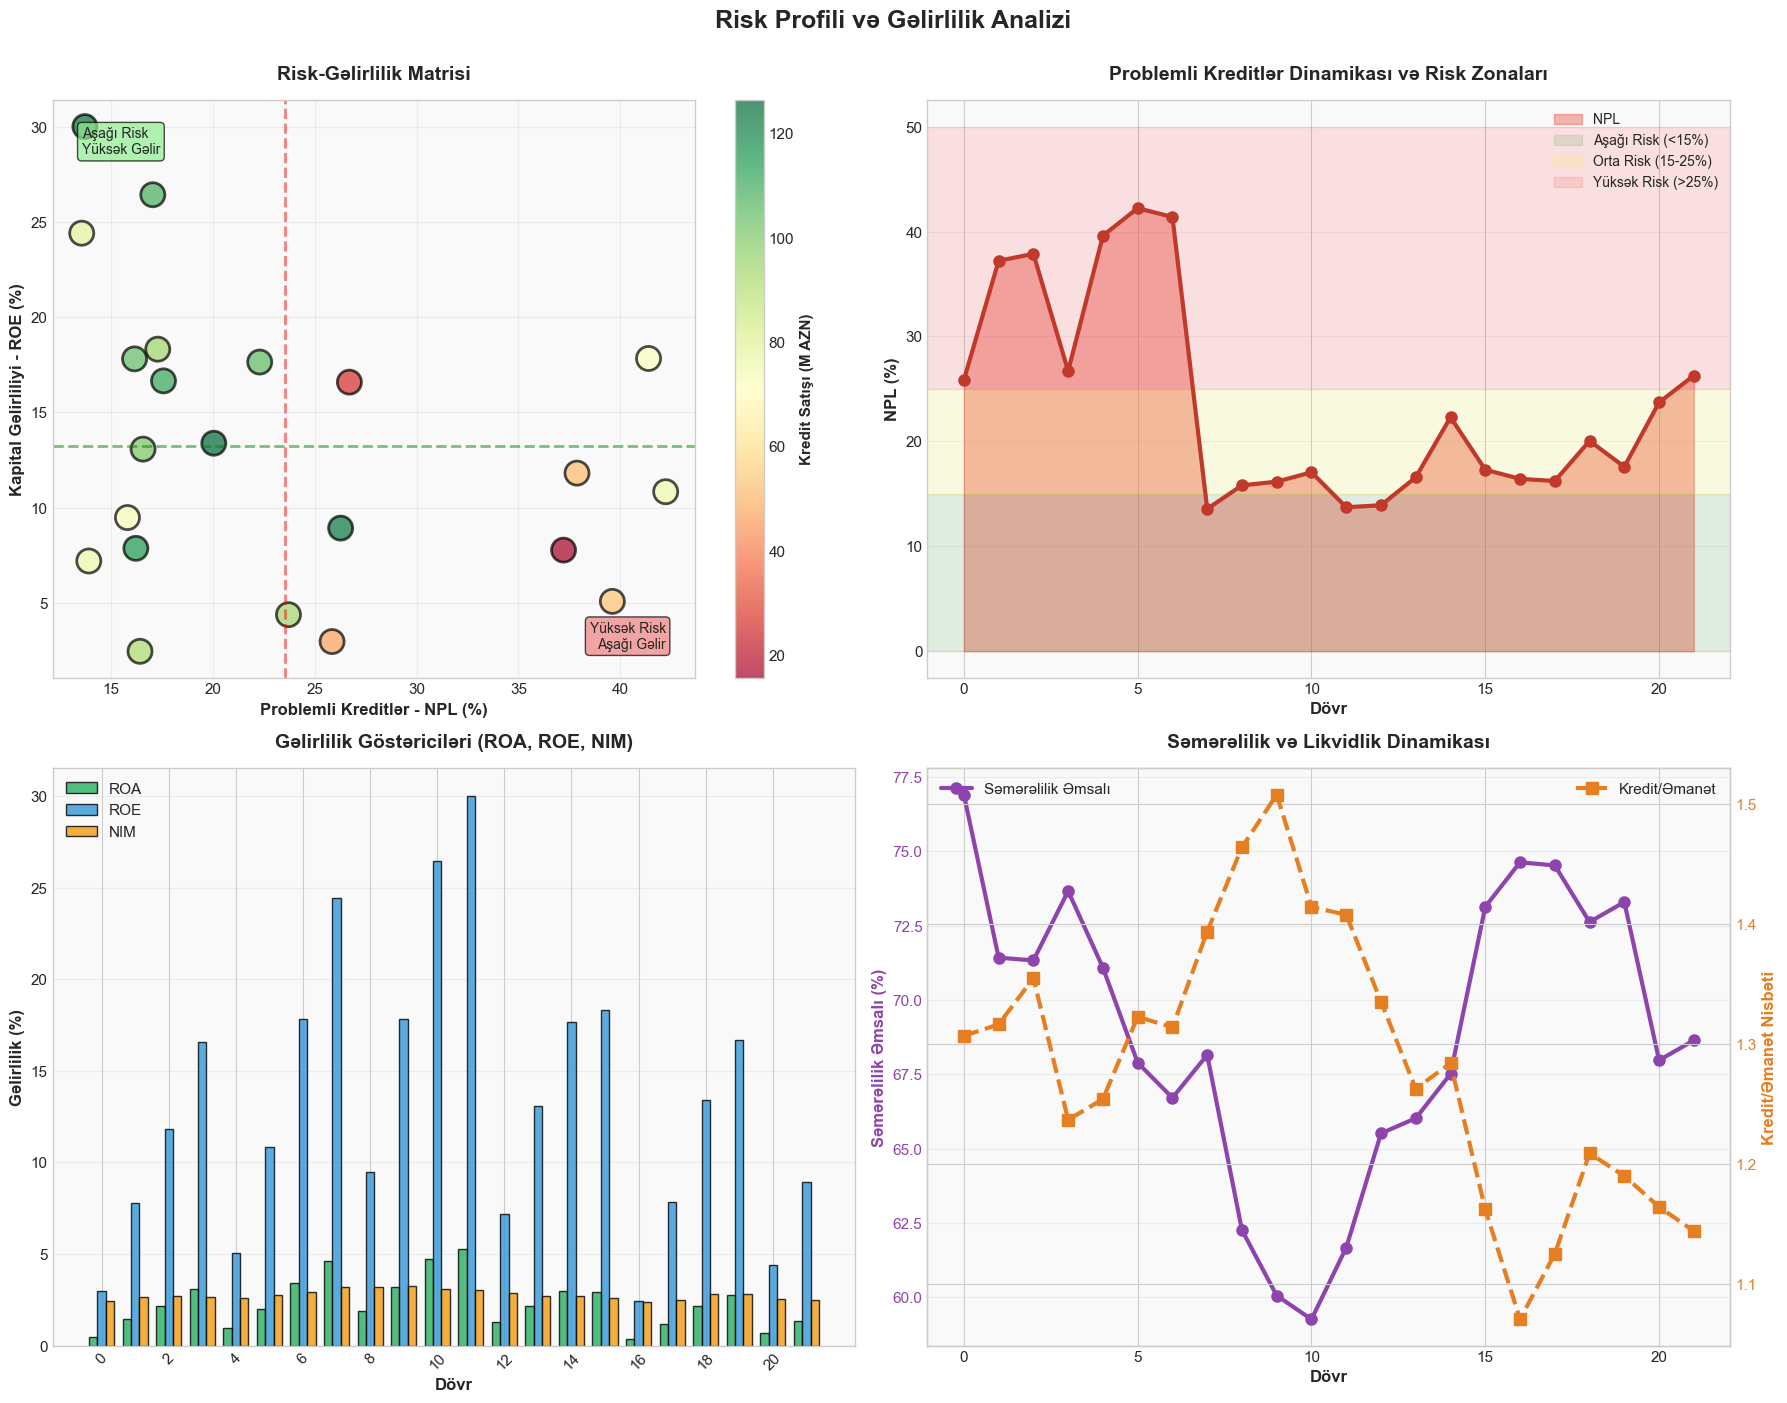

✅ Qrafik 10 yaradıldı: Risk və Gəlirlilik


In [16]:
# GRAFİK 10: Risk Profili və Gəlirlilik
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 10.1: Risk-Gəlirlilik Matrisi (NPL vs ROE)
ax1 = axes[0, 0]
scatter = ax1.scatter(df['NPLs'], df['ROE']*100, 
                     c=df[target]/1e6, s=300, alpha=0.7, 
                     cmap='RdYlGn', edgecolors='black', linewidth=2)

# Ortalama xətlər
ax1.axvline(x=df['NPLs'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.5)
ax1.axhline(y=(df['ROE']*100).mean(), color='green', linestyle='--', linewidth=2, alpha=0.5)

# Kvadrantlar
ax1.text(df['NPLs'].min(), (df['ROE']*100).max(), 
        'Aşağı Risk\nYüksək Gəlir', ha='left', va='top', 
        fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
ax1.text(df['NPLs'].max(), (df['ROE']*100).min(), 
        'Yüksək Risk\nAşağı Gəlir', ha='right', va='bottom', 
        fontsize=10, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Kredit Satışı (M AZN)', fontsize=11, fontweight='bold')

ax1.set_xlabel('Problemli Kreditlər - NPL (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Kapital Gəlirliliyi - ROE (%)', fontsize=12, fontweight='bold')
ax1.set_title('Risk-Gəlirlilik Matrisi', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)
ax1.set_facecolor('#F9F9F9')

# 10.2: Zaman üzrə risk dinamikası
ax2 = axes[0, 1]
ax2.fill_between(df['Time_Index'], 0, df['NPLs'], alpha=0.4, color='#E74C3C', label='NPL')
ax2.plot(df['Time_Index'], df['NPLs'], 
         marker='o', linewidth=3, markersize=8, color='#C0392B')

# Risk zonalar
ax2.axhspan(0, 15, alpha=0.1, color='green', label='Aşağı Risk (<15%)')
ax2.axhspan(15, 25, alpha=0.1, color='yellow', label='Orta Risk (15-25%)')
ax2.axhspan(25, 50, alpha=0.1, color='red', label='Yüksək Risk (>25%)')

ax2.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax2.set_ylabel('NPL (%)', fontsize=12, fontweight='bold')
ax2.set_title('Problemli Kreditlər Dinamikası və Risk Zonaları', 
              fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=10, loc='best')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_facecolor('#F9F9F9')

# 10.3: Gəlirlilik göstəriciləri (Note: ROA has trailing space)
ax3 = axes[1, 0]
x_pos = np.arange(len(df))
width = 0.25

ax3.bar(x_pos - width, df['ROA ']*100, width, label='ROA', 
        color='#27AE60', edgecolor='black', alpha=0.8)
ax3.bar(x_pos, df['ROE']*100, width, label='ROE', 
        color='#3498DB', edgecolor='black', alpha=0.8)
ax3.bar(x_pos + width, df['Net_Interest_Margin']*100, width, label='NIM', 
        color='#F39C12', edgecolor='black', alpha=0.8)

ax3.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax3.set_ylabel('Gəlirlilik (%)', fontsize=12, fontweight='bold')
ax3.set_title('Gəlirlilik Göstəriciləri (ROA, ROE, NIM)', 
              fontsize=14, fontweight='bold', pad=15)
ax3.set_xticks(x_pos[::2])
ax3.set_xticklabels(df['Time_Index'][::2], rotation=45)
ax3.legend(fontsize=11, loc='upper left')
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_facecolor('#F9F9F9')

# 10.4: Səmərəlilik və Likvidlik
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()

ax4.plot(df['Time_Index'], df['Efficiency_Ratio']*100, 
         marker='o', linewidth=3, markersize=8, color='#8E44AD', 
         label='Səmərəlilik Əmsalı')
ax4_twin.plot(df['Time_Index'], df['Loan-to-Deposit_Ratio'], 
              marker='s', linewidth=3, markersize=8, color='#E67E22', 
              label='Kredit/Əmanət', linestyle='--')

ax4.set_xlabel('Dövr', fontsize=12, fontweight='bold')
ax4.set_ylabel('Səmərəlilik Əmsalı (%)', fontsize=12, fontweight='bold', color='#8E44AD')
ax4_twin.set_ylabel('Kredit/Əmanət Nisbəti', fontsize=12, fontweight='bold', color='#E67E22')
ax4.set_title('Səmərəlilik və Likvidlik Dinamikası', 
              fontsize=14, fontweight='bold', pad=15)
ax4.tick_params(axis='y', labelcolor='#8E44AD')
ax4_twin.tick_params(axis='y', labelcolor='#E67E22')
ax4.legend(loc='upper left', fontsize=11)
ax4_twin.legend(loc='upper right', fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_facecolor('#F9F9F9')

plt.suptitle('Risk Profili və Gəlirlilik Analizi', fontsize=18, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('images/10_risk_gelirlilik.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Qrafik 10 yaradıldı: Risk və Gəlirlilik")

## 5️⃣ Statistik Xülasə - Təqdimat üçün

In [17]:
# Yekun statistik hesabat
print("="*100)
print("TƏQDİMAT ÜÇÜN ƏSAS RƏQƏMLƏr - YEKUN HESABAT")
print("="*100)

print("\n📊 1. KREDİT SATIŞI ƏSAS GÖSTƏRİCİLƏrİ:")
print(f"   • Ortalama rüblük satış: {df[target].mean()/1e6:.2f} Milyon AZN")
print(f"   • Ümumi satış (5+ il): {df[target].sum()/1e6:.2f} Milyon AZN")
print(f"   • Ən yüksək satış: {df[target].max()/1e6:.2f} Milyon AZN ({df.loc[df[target].idxmax(), 'Rüblər']})")
print(f"   • Ən aşağı satış: {df[target].min()/1e6:.2f} Milyon AZN ({df.loc[df[target].idxmin(), 'Rüblər']})")
print(f"   • Artım (ilk vs son rüb): {((df[target].iloc[-1] / df[target].iloc[0]) - 1) * 100:.1f}%")

print("\n📊 2. ARTIM SÜrƏTLƏrİ:")
print(f"   • Ortalama QoQ artım: {df[target].pct_change().mean() * 100:.2f}%")
print(f"   • Ortalama YoY artım: {df[target].pct_change(periods=4).mean() * 100:.2f}%")
print(f"   • Son il artım: {df[target].pct_change(periods=4).iloc[-1] * 100:.2f}%")

print("\n📊 3. MÖVSÜMİLİK:")
for q in [1, 2, 3, 4]:
    q_avg = df[df['Quarter']==q][target].mean() / 1e6
    print(f"   • Q{q} ortalama: {q_avg:.2f} Milyon AZN")

best_q = df.groupby('Quarter')[target].mean().idxmax()
worst_q = df.groupby('Quarter')[target].mean().idxmin()
print(f"\n   ⭐ Ən yaxşı rüb: Q{best_q}")
print(f"   ⚠️  Ən zəif rüb: Q{worst_q}")

print("\n📊 4. ƏSAS KORRELYASİYALAR:")
top_5_corr = correlations[correlations.index != target].abs().nlargest(5)
for feat in top_5_corr.index:
    corr_val = correlations[feat]
    print(f"   • {feat:45s}: {corr_val:+.3f}")

print("\n📊 5. BANK PERFORMANCE:")
print(f"   • Ortalama ROE: {(df['ROE']*100).mean():.2f}%")
print(f"   • Ortalama ROA: {(df['ROA ']*100).mean():.2f}%")  # Note: ROA has trailing space
print(f"   • Ortalama NPL: {df['NPLs'].mean():.2f}%")
print(f"   • Ortalama Səmərəlilik: {(df['Efficiency_Ratio']*100).mean():.2f}%")
print(f"   • Ortalama L/D Ratio: {df['Loan-to-Deposit_Ratio'].mean():.2f}")

print("\n📊 6. MÜŞTƏrİ BАZASİ:")
print(f"   • İlk rüb: {df['Müştəri_sayı'].iloc[0]:,.0f} nəfər")
print(f"   • Son rüb: {df['Müştəri_sayı'].iloc[-1]:,.0f} nəfər")
print(f"   • Artım: {((df['Müştəri_sayı'].iloc[-1] / df['Müştəri_sayı'].iloc[0]) - 1) * 100:.1f}%")
print(f"   • Müştəri başına ortalama satış: {(df[target] / df['Müştəri_sayı']).mean():,.0f} AZN")

print("\n📊 7. MAKROİQTİSADİ KONTEKST:")
print(f"   • Ortalama GDP: {df['GDP'].mean()/1e6:.2f} Milyon AZN")
print(f"   • GDP artımı: {((df['GDP'].iloc[-1] / df['GDP'].iloc[0]) - 1) * 100:.1f}%")
print(f"   • Ortalama neft qiyməti: ${df['Oil_Price'].mean():.2f}/barel")
print(f"   • Bazar penetrasiyası: {((df[target] / df['GDP']) * 100).mean():.2f}%")

print("\n" + "="*100)
print("✅ HESABAT TAMAMLANDI - TƏQDİMAT HAZIRDIR")
print("="*100)

TƏQDİMAT ÜÇÜN ƏSAS RƏQƏMLƏr - YEKUN HESABAT

📊 1. KREDİT SATIŞI ƏSAS GÖSTƏRİCİLƏrİ:
   • Ortalama rüblük satış: 84.88 Milyon AZN
   • Ümumi satış (5+ il): 1867.47 Milyon AZN
   • Ən yüksək satış: 126.29 Milyon AZN (2024 III)
   • Ən aşağı satış: 15.71 Milyon AZN (2020 II )
   • Artım (ilk vs son rüb): 164.0%

📊 2. ARTIM SÜrƏTLƏrİ:
   • Ortalama QoQ artım: 16.09%
   • Ortalama YoY artım: 48.40%
   • Son il artım: 6.78%

📊 3. MÖVSÜMİLİK:
   • Q1 ortalama: 72.49 Milyon AZN
   • Q2 ortalama: 89.05 Milyon AZN
   • Q3 ortalama: 92.41 Milyon AZN
   • Q4 ortalama: 87.22 Milyon AZN

   ⭐ Ən yaxşı rüb: Q3
   ⚠️  Ən zəif rüb: Q1

📊 4. ƏSAS KORRELYASİYALAR:
   • Rolling_Mean_2                               : +0.930
   • GDP                                          : +0.902
   • Rolling_Mean_3                               : +0.889
   • Rolling_Mean_4                               : +0.846
   • Xarici_ticarət_dövriyyəsi                    : +0.844

📊 5. BANK PERFORMANCE:
   • Ortalama ROE: 13.22%
 